# Normalização e Regularização

## Revisão

### Regressão Linear Simples


<img src = "./imgs/reg_lin_explicacao.png" width = "30%"></img>


Na regressão linear simples, temos o modelo como: $Y \approx \beta_0 + \beta_1 X$

- $Y$ é a variável dependente, pois é escrita em função de variável $X$
- $X$ é a variável independente, pois a partir dela chegaremos em valores estimados de $Y$, também denotado por $\hat{Y}$
- $\beta_0$ é chamado de **intercepto** pois define o valor que intercepta o eixo $y$ quando $x = 0$. Muitas vezes pode ser interpretado como o valor mínimo associado ao determinado experimento.
- $\beta_1$ é chamado de **coeficiente angular**, ou ainda, **coeficiente de proporcionalidade**, pois define a qual taxa as variáveis $X$ e $Y$ se relacionam.

A questão agora é, como encontramos os valores de $\tilde{\beta}$?

### Regressão Linear Múltipla

Na regressão linear múltipla, temos o modelo como: $Y = \beta_0 + \beta_1 X_1  + \beta_2 X_2 + ... + \beta_n X_n$

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Carregando o CSV
cars = pd.read_csv("./data/CarPrice.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [63]:
cols = ['fueltype',
        'aspiration',
        'doornumber',
        'carbody', 
        'cylindernumber',
        'drivewheel',
        'enginelocation',
        'enginetype',
        'fuelsystem']

In [64]:
# dummies
cars_with_dummies = pd.get_dummies(cars, prefix_sep="_", columns=cols, drop_first=True)

In [65]:
cars_with_dummies.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,13495.00,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,16500.00,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,94.50,171.20,65.50,52.40,2823,152,2.68,3.47,9.00,154,5000,19,26,16500.00,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,99.80,176.60,66.20,54.30,2337,109,3.19,3.40,10.00,102,5500,24,30,13950.00,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,99.40,176.60,66.40,54.30,2824,136,3.19,3.40,8.00,115,5500,18,22,17450.00,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [66]:
#dummies
X = cars_with_dummies.drop(["car_ID", "symboling", "CarName","price"], axis = 1)
y = cars_with_dummies.price

In [67]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [68]:
# Instancia o modelo
linreg = LinearRegression()

In [69]:
# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
linreg.fit(X_train, y_train)

LinearRegression()

In [70]:
# Para os dados novos, vamos definir a predição para a base de teste
y_pred = linreg.predict(X_test)

In [71]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
rmse

2921.7685627383025

In [72]:
metrics.r2_score(y_test, y_pred)

0.8439314210774072

In [73]:
#intercept
linreg.intercept_

-12998.989001017113

In [74]:
coefs = linreg.coef_

list_columns = X.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Vars': list_feature,
              'Coefs': list_score}

df_features = pd.DataFrame(dictionary)
df_features[["abs_coefs"]] = df_features.Coefs.abs()
df_features = df_features.sort_values(by=['abs_coefs'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
#df_features.head(10)
df_features

,Vars,Coefs,abs_coefs
0,cylindernumber_four,-12059.22,12059.22
1,cylindernumber_twelve,-10515.66,10515.66
2,cylindernumber_five,-10310.54,10310.54
3,enginelocation_rear,9422.80,9422.80
4,enginetype_ohcv,-8238.20,8238.20
5,enginetype_dohcv,-7591.48,7591.48
6,cylindernumber_six,-7190.36,7190.36
7,fuelsystem_mfi,-6111.02,6111.02
8,fueltype_gas,-5754.93,5754.93
9,fuelsystem_idi,5754.93,5754.93


# Normalização

Uma pergunta natural que surge ao se olhar para os coeficientes da regressão é "Qual a variável que mais contribuí para explicar minha medida de interesse?". Uma possibilidade seria pensar em avaliar os coeficientes gerados pela regressão e verificar quais tem o maior valor absoluto, correto?

Vamos pensar no caso em que queremos predizer renda (em reais) de uma pessoa com base na sua idade (em anos), altura (em cm) e peso (em kg). Logo:

$$ Renda = \beta_0 + \beta_1*Idade + \beta_2*Altura + \beta_3*Peso \\ = 1100 + 0.3*Idade + 0.2*Altura + 0.4*Peso$$

Disso temos que **um aumento de 20cm na altura de uma pessoa tem o mesmo efeito na renda do que aumentar o peso em 10 unidades**. 

Para remover o efeito de escala das variáveis e conseguirmos analisar o impacto das variáveis nos modelos que nós aplicamos o processo de normalização, i.e., calcular o Z-score de cada observação:

$$Z_i = \dfrac{X_i - \overline{X}}{\sigma_X}$$

Dado que estamos utilizando o Z-Score agora a interpretação do coeficiente muda e passamos a entender que **a cada 1 desvio padrão em X temos uma mudança de $\beta$ desvios padrões de Y**, muito embora nós não fazemos essa distinção e usamos os coeficientes normalizados apenas como **Rank** para avaliar a importância de cada variável para o modelo.

Ex.:

$$Y = \beta_0 + 0.5*X_1 + 1*X_2 + \epsilon$$

Neste caso $X_2$ é duas vezes mais importante que $X_1$ para predizer $Y$, assumindo que $X_1$ e $X_2$ sigam aproximadamente a mesma distribuição e portanto seus desvios padrões não sejam tão diferentes.

$$ Renda = \beta_0 + \beta_1*Idade Normalizada + \beta_2*Altura Normalizada + \beta_3*Peso Normalizada \\ = 0.2*Idade Normalizada + 0.7*Altura  Normalizada+ 0.21*Peso  Normalizada$$

## Refazendo a regressão

In [21]:
# pacote

In [4]:
#Scaler

In [5]:
#Original x Padronizado

In [6]:
# Regressao

In [54]:
pd.set_option('display.float_format', '{:.2f}'.format)
np.set_printoptions(suppress=True)

In [7]:
#coefs

In [ ]:
#coefs

In [59]:
coefs = linreg_std.coef_

list_columns = X.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs[0]):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Vars': list_feature,
              'Coefs': list_score}

df_features_std = pd.DataFrame(dictionary)
df_features_std[["abs_coefs"]] = df_features_std.Coefs.abs()
df_features_std = df_features_std.sort_values(by=['abs_coefs'], ascending=False)
df_features_std.reset_index(inplace=True, drop=True)
#df_features.head(10)
df_features_std

,Vars,Coefs,abs_coefs
0,enginesize,0.64,0.64
1,cylindernumber_four,-0.63,0.63
2,curbweight,0.43,0.43
3,compressionratio,-0.40,0.40
4,cylindernumber_five,-0.31,0.31
5,cylindernumber_six,-0.29,0.29
6,enginetype_ohcv,-0.24,0.24
7,fuelsystem_idi,0.21,0.21
8,fueltype_gas,-0.21,0.21
9,stroke,-0.19,0.19


### ou de forma mais simples...

**Para Regressão Linear:**

$$\gamma_i = \beta_i * \dfrac{\sigma_{X_i}}{\sigma_Y}$$

**Para Regressão Logistica:**
$$\gamma_i = \dfrac{\sqrt{3}}{\pi}*\dfrac{\sigma_{X_i}}{\beta_i}$$



EX.:

In [8]:
# calc

# Regularização

In [ ]:
import random

In [91]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])

np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))

data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

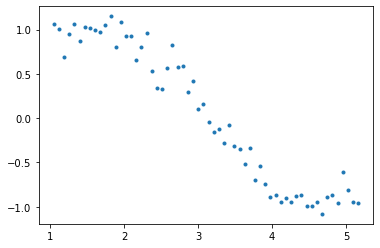

In [93]:
plt.plot(data['x'],data['y'],'.');

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# define a transformação nos dados
tranformer = PolynomialFeatures(degree = 15, include_bias=False)
x = x.reshape((-1,1))

tranformer.fit(x)

# transforma os dados incluindo uma nova coluna com valores quadráticos
trans_x = tranformer.transform(x)
trans_x

In [101]:
data = pd.DataFrame(trans_x, columns=["x"] + [f'x_{i}' for i in range(2,16)])

In [102]:
data[['y']] = y
data

,x,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,y
0,1.05,1.10,1.15,1.20,1.26,1.32,1.38,1.45,1.51,1.59,1.66,1.74,1.82,1.91,2.00,1.07
1,1.12,1.25,1.39,1.56,1.74,1.94,2.17,2.42,2.71,3.02,3.38,3.77,4.21,4.71,5.26,1.01
2,1.19,1.41,1.67,1.98,2.35,2.79,3.32,3.94,4.67,5.54,6.58,7.81,9.27,11.00,13.06,0.70
3,1.26,1.58,1.98,2.49,3.13,3.94,4.95,6.22,7.81,9.82,12.34,15.51,19.49,24.49,30.77,0.95
4,1.33,1.76,2.33,3.10,4.11,5.45,7.22,9.58,12.71,16.86,22.37,29.67,39.35,52.20,69.24,1.06
5,1.40,1.95,2.72,3.80,5.31,7.41,10.35,14.45,20.17,28.16,39.32,54.90,76.66,107.04,149.45,0.88
6,1.47,2.15,3.15,4.62,6.77,9.93,14.56,21.34,31.29,45.87,67.25,98.60,144.56,211.93,310.71,1.03
7,1.54,2.36,3.62,5.56,8.55,13.13,20.16,30.97,47.56,73.05,112.19,172.31,264.66,406.48,624.31,1.02
8,1.61,2.58,4.14,6.65,10.67,17.14,27.52,44.19,70.96,113.93,182.94,293.75,471.68,757.38,1216.12,1.00
9,1.68,2.81,4.70,7.88,13.21,22.13,37.07,62.11,104.07,174.38,292.17,489.53,820.22,1374.30,2302.66,0.97


In [103]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend([f'x_{i}' for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

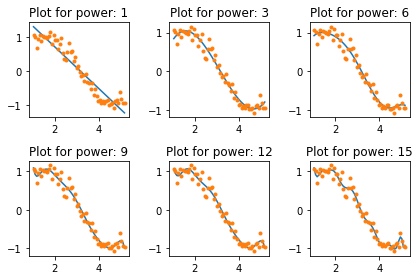

In [104]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [105]:
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.28,1.96,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.28,1.91,-0.58,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.10,-1.08,3.03,-1.29,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.08,-0.27,1.69,-0.53,-0.04,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.02,2.99,-5.12,4.72,-1.93,0.33,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.80,9.52,-9.71,5.23,-1.55,0.23,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19.30,-55.95,68.96,-44.63,16.51,-3.53,0.40,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43.17,-137.01,183.83,-133.50,57.68,-15.25,2.42,-0.21,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,167.84,-614.51,963.40,-846.44,460.90,-161.85,36.76,-5.22,0.42,-0.01,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,137.72,-486.13,726.13,-595.88,293.26,-87.46,14.55,-0.81,-0.14,0.03,-0.00,NaN,NaN,NaN,NaN,NaN


A medida que a complexidade do modelo aumento, os coeficientes aumento exponencialmente. Isso significa que estamos colocando muita enfase naquela feature e quando se torna muito grande isso indica que o algoritmo está modelando relações complexas para estimar o output e acaba ocorrendo overfitting. Para penalizar os coeficientes ao se adicionar muitas variáveis, e com isso lidar com o overfitting em grandes conjuntos de dados que aplicamos regularização.

## Regularização Ridge ou L2

$$mse = \dfrac{1}{n}\sum_{i=1}^n(Y_i - p_\beta(X_i))^2 + \lambda\sum_{i=1}^n\beta_i^2$$

em que 

$$p_\beta(X) = \beta_0 +\beta_1X + \beta_2X^2+...+\beta_k X^k$$

De forma que quando:
- $\lambda = 0$
    - voltamos a regressão linear usual
- $\lambda \rightarrow \infty$
    - $\tilde{\beta} \rightarrow 0$ para combater o efeito da penalização dado que qualquer valor diferente de 0 tornaria a função de otimização divergente.
- $\lambda \in (0;\infty)$
    - A magnitude de $\lambda$ definirá o peso dos coeficientes entre 0 e o valor da regressão simples.
   

In [106]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.59334e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


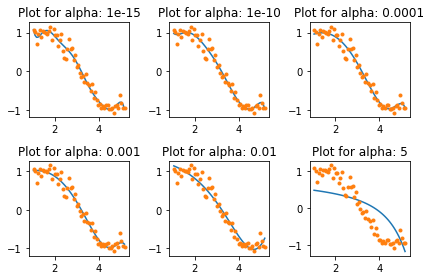

In [107]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

Conforme discutido, quando lambda aumenta a complexidade do modelo reduz. Porém atenção isso pode causar **undefitting**

In [110]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,95,-3e+02,3.8e+02,-2.4e+02,71,-2,-3.7,0.4,0.17,-0.025,-0.0057,0.00082,0.00021,-5.1e-05,3.3e-06,-3.9e-08
alpha_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
alpha_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
alpha_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
alpha_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
alpha_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
alpha_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
alpha_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
alpha_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
alpha_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


Conclusões:
- O erro aumenta conforme lambda aumenta, pois a complexidade do modelo está diminuindo.
- Mesmo um valor infimo de lambda reduz significativamente os valores dos coeficientes
- Valores elevados de lambda podem facilmente gerar underfitting.
- Apesar dos coeficientes serem pequenos eles **NÃO SÃO IGUAIS A ZERO**, pois lambda é um valor finito.

In [111]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

## Regularização Lasso ou L1

LASSO - *Least Absolute Shrinkage and Selection Operator* se aproxima muito da regressão Ridge, mas duas palavras aqui são fundamentais: **absolute** e **selection**.

$$mse = \dfrac{1}{n}\sum_{i=1}^n(Y_i - p_\beta(X_i))^2 + \lambda\sum_{i=1}^n|\beta_i|$$

em que 

$$p_\beta(X) = \beta_0 +\beta_1X + \beta_2X^2+...+\beta_k X^k$$

In [115]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47835738259038024, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47828183990570994, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47079330190426194, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(


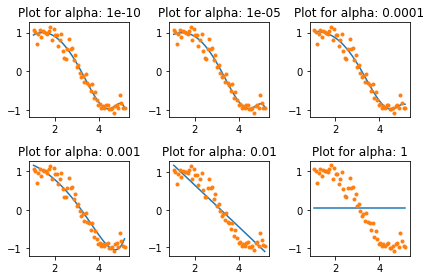

In [116]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [117]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.96,0.22,1.1,-0.37,0.00089,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-10,0.96,0.22,1.1,-0.37,0.00088,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-08,0.96,0.22,1.1,-0.37,0.00077,0.0016,-0.00011,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.3e-09,2e-10,-1.9e-10,-9.3e-11
alpha_1e-05,0.96,0.5,0.6,-0.13,-0.038,-0,0,0,0,7.7e-06,1e-06,7.7e-08,0,0,0,-0,-7e-11
alpha_0.0001,1,0.9,0.17,-0,-0.048,-0,-0,0,0,9.5e-06,5.1e-07,0,0,0,-0,-0,-4.4e-11
alpha_0.001,1.7,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,1.5e-08,7.5e-10,0,0,0
alpha_0.01,3.6,1.8,-0.55,-0.00056,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [119]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001    10
alpha_0.001     12
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

**Conclusões:**
- O erro aumenta conforme lambda aumenta, pois a complexidade do modelo está diminuindo.
- Mesmo um valor infimo de lambda reduz significativamente os valores dos coeficientes
- Valores elevados de lambda podem facilmente gerar underfitting.
- A partir de determinados valores de lambda os coeficientes começam a **SE TORNAR IGUAIS A ZERO**. Nesse sentido Lasso pode ser utilizado como um método de seleção de variáveis.

**Comparativo com Ridge (não é regra):**
- Para um mesmo valor de lambda, os coeficientes da Lasso são bem menores.
- Para um mesmo valor de lambda, a Lasso tem um erro maior (pior ajuste).